# Athens Weather Analysis

> *Practical Data Science*  
> *MSc in Data Science, Department of Informatics*  
> *Athens University of Economics and Business*

---

<p style='text-align: justify;'>Athens is the capital and largest city of Greece and one of the world's oldest cities, with its recorded history spanning over 3.400 years and its earliest human presence beginning somewhere between the 11th and the 7th centuries BC. Athens is known for its hot-summer Mediterranean climate. The dominant feature of Athens' climate is alternation between prolonged hot and dry summers because of the dry and hot winds blowing from the Sahara, and mild, wetter winters with moderate rainfall, due to the westerly winds. With an average of 433 millimetres (17.0 in) of yearly precipitation, rainfall occurs largely between the months of October and April. July and August are the driest months when thunderstorms occur sparsely.</p>

<p style='text-align: justify;'>Athens is affected by the urban heat island effect in some areas which is caused by human activity, altering its temperatures compared to the surrounding rural areas, and leaving detrimental effects on energy usage, expenditure for cooling, and health. The urban heat island of the city has also been found to be partially responsible for alterations of the climatological temperature time-series of specific Athens meteorological stations, because of its impact on the temperatures and the temperature trends recorded by some meteorological stations.</p>

Our goal in this project is to explore the weather in Athens over a period of more than 50 years (1955-2020).


## *Table of Contents*

- [*1. Introduction*](#introduction)
    - [*1.1. Libraries*](#libraries)
    - [*1.2. NOAA - Data Collection & Cleansing*](#noaa)
    - [*1.3. HDS - Data Collection & Cleansing*](#hds)
- [*2. Deviation of Summer Temperatures*](#summer_temperatures)
    - [*2.1. Baseline*](#baseline_2)
    - [*2.2. Main Graph*](#main_graph_2)
- [*3. Evolution of Daily Temperatures*](#daily_temperatures)
    - [*3.1. Baseline*](#baseline_3)
    - [*3.2. Main Graph*](#main_graph_3)
- [*4. Extreme Temperature Events*](#extreme_temperatures)
    - [*4.1. Baseline*](#baseline_4)
    - [*4.2. Main Graph*](#main_graph_4)
- [*5. Precipitation*](#precipitation)
    - [*5.1. Main Graph*](#main_graph_5)

---

## 1. Introduction <a class='anchor' id='introduction'></a>

### *1.1. Libraries* <a class='anchor' id='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date
import calendar

import warnings
warnings.filterwarnings('ignore')

### *1.2. NOAA - Data Collection & Cleansing* <a class='anchor' id='noaa'></a>

- The data was obtained from the [National Oceanic and Atmospheric Administration's National Centers for Environmental Information (NOAA)](https://www.ncdc.noaa.gov/cdo-web/search)
- As we focus on Athens, we will use the data from the Hellenikon weather station
- To fill in any missing data, we will later use an alternative dataset from the [Hellenic Data Service (HDS)](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f), which covers only the period from 2010-2019

Each record of the ***NOAA*** dataset consists of all the observations (values) available for a given station-day:
   - **STATION**: The station identification code (for a complete list of stations and their metadata click [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt))
   - **NAME**: The name of the station (usually city or airport name)
   - **LATITUDE**: The latitude of the station
   - **LONGITUDE**: The longitude of the station
   - **ELEVATION**: The elevation above mean sea level (tenths of meters)
   - **DATE**: The year of the record (4 digits), followed by month (2 digits) and day (2 digits)
   - **PRCP**: Precipitation (mm)
   - **SNWD**: Snow depth (mm)
   - **TAVQ**: Average temperature (°C)
   - **TMAX**: Maximum temperature (°C)
   - **TMIN**: Minimum temperature (°C)

##### *Read the data*

In [2]:
# read the data
noaa = pd.read_csv('./data/ncdc_noaa.csv', parse_dates=['DATE'])

# convert columns to lowercase
noaa.columns = noaa.columns.str.lower()

# preview
noaa.head()

,station,name,latitude,longitude,elevation,date,prcp,snwd,tavg,tmax,tmin
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-01,0.0,NaN,NaN,18.5,10.2
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-02,2.0,NaN,NaN,14.4,7.0
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-03,0.0,NaN,NaN,15.8,9.6
3,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-04,0.0,NaN,NaN,18.8,7.3
4,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-05,0.0,NaN,NaN,17.9,8.4


In [3]:
noaa.shape

(23251, 11)

In [4]:
noaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   station    23251 non-null  object        
 1   name       23251 non-null  object        
 2   latitude   23251 non-null  float64       
 3   longitude  23251 non-null  float64       
 4   elevation  23251 non-null  float64       
 5   date       23251 non-null  datetime64[ns]
 6   prcp       22773 non-null  float64       
 7   snwd       30 non-null     float64       
 8   tavg       20940 non-null  float64       
 9   tmax       22307 non-null  float64       
 10  tmin       22418 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 2.0+ MB


##### *Check for missing values*

In [5]:
print(f'{noaa.isna().sum()}\n\nThere are {noaa.isna().sum().sum()} nan values in total.')

station          0
name             0
latitude         0
longitude        0
elevation        0
date             0
prcp           478
snwd         23221
tavg          2311
tmax           944
tmin           833
dtype: int64

There are 27787 nan values in total.


##### *Check for missing values from 01/01/2010 to 31/12/2019*

In [6]:
noaa[(noaa.date.dt.year > 2009) & (noaa.date.dt.year < 2020)].isna().sum()

station         0
name            0
latitude        0
longitude       0
elevation       0
date            0
prcp          102
snwd         2782
tavg            0
tmax          820
tmin          449
dtype: int64

##### *Check for bad data / outliers*
- The columns that will concern us most are `prcp` and `tavg`
- Therefore, we will look for bad data in these two columns 
- Specifically, we will look for extreme maximum or minimum values, indicating either missing data filled in with extreme false values or outliers

In [7]:
# check data
print(f'prcp max: {noaa.prcp.max()}')
print(f'prcp min: {noaa.prcp.min()}')
print(f'tavg max: {noaa.tavg.max()}')
print(f'tavg min: {noaa.tavg.min()}')

prcp max: 142.0
prcp min: 0.0
tavg max: 34.8
tavg min: -2.0


- There seems to be a high level of rainfall (142mm) for a particular day
- Let's take a closer look at the top 5 rainy days
- We will try to figure out if this number is due to a day with a lot of rain or just bad data

##### *Check the top 5 rainy days*

In [8]:
noaa[['date', 'prcp', 'tmax', 'tmin']].sort_values(by='prcp', ascending=False).head(5)

,date,prcp,tmax,tmin
15790,1998-03-26,142.0,8.4,4.8
16147,1999-03-18,98.5,12.0,6.4
17110,2001-11-05,96.8,14.6,9.4
16029,1998-11-20,96.3,16.4,12.2
11778,1987-04-01,92.3,13.0,8.2


- Well, it looks like it's just a day with heavy rain in 1998
- Therefore, our data does not contain bad data or outliers in the columns of interest

##### *Check if there are any dates missing from 01/01/2010 to 31/12/2019*

- We will calculate the number of days in this period
- Next, we will calculate the number of days we have in our data
- By subtracting the previous two numbers, we find the number of days missing from our data

In [9]:
# start date
d1 = date(2010,1,1)

# end date
d2 = date(2020,1,1)

# calculate the difference between these dates
delta = d2 - d1

# get the difference as a number of days
days_in_period = delta.days

# print the number of days between 01/01/2010 and 31/12/2019
print(f'There should be {days_in_period} days in this period.')

There should be 3652 days in this period.


In [10]:
# calculate the number of days in our data
days_in_data = noaa[(noaa.date.dt.year > 2009) & (noaa.date.dt.year < 2020)].date.nunique()

# print the number of days in our data
print(f'However, there are {days_in_data} days in our data.')

However, there are 2799 days in our data.


In [11]:
# calculate the number of missing days in our data
days_missing = days_in_period - days_in_data

# print the number of missing days in our data
print(f'Therefore, there are {days_missing} days missing from 01/01/2010 to 31/12/2019 in the NOAA dataset.')

Therefore, there are 853 days missing from 01/01/2010 to 31/12/2019 in the NOAA dataset.


- We will try to find data for these dates from another dataset that we will obtain later
- But first, let's stick to the `noaa` dataset and take a closer look at it
- We notice that there are some records in our dataset where the following applies:
    - `tavg > tmax`
    - `tavg < tmin`

In [12]:
noaa[(noaa.tavg > noaa.tmax) | (noaa.tavg < noaa.tmin)]

,station,name,latitude,longitude,elevation,date,prcp,snwd,tavg,tmax,tmin
6683,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1973-04-19,4.2,NaN,12.6,14.4,12.8
9141,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1980-01-11,0.0,NaN,9.5,11.6,9.6
9495,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1980-12-30,0.8,NaN,7.3,9.0,7.8
9830,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1981-11-30,0.5,NaN,12.4,16.3,12.5
9914,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1982-02-22,13.9,NaN,9.5,11.2,9.6
10549,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1983-11-19,1.3,NaN,10.3,11.6,10.4
11358,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1986-02-05,0.0,NaN,6.5,6.4,5.2
11666,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1986-12-10,0.0,NaN,9.2,10.4,9.4
11733,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1987-02-15,1.2,NaN,12.9,15.8,13.0
11739,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1987-02-21,0.0,NaN,13.9,17.0,14.0


- This is weird because it doesn't really make sense in real life
- We will assume that in these cases there has been some typing error, thus:
    - we will swap the values between `tavg` and `tmax` where `tavg > tmax`
    - we will swap the values between `tavg` and `tmin` where `tavg < tmin`
- To do this, we will find the indices where `tavg > tmax` or `tavg < tmin`
- Then, for the indices found, we will do the swap

##### *Fix the values*

In [13]:
# find indices where tavg > tmax
idx_max = noaa[noaa.tavg > noaa.tmax].index

# find indices where tavg < tmin
idx_min = noaa[noaa.tavg < noaa.tmin].index

# swap values between tavg and tmax, where tavg > tmax
noaa.loc[idx_max,['tavg','tmax']] = noaa.loc[idx_max,['tmax','tavg']].values

# swap values between tavg and tmin, where tavg < tmin
noaa.loc[idx_min,['tavg','tmin']] = noaa.loc[idx_min,['tmin','tavg']].values

### *1.3. HDS - Data Collection & Cleansing* <a class='anchor' id='hds'></a>

- As we mentioned earlier, we obtained the second dataset from the [Hellenic Data Service (HDS)](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f)
- We will use this dataset to fill in any missing values in the ***NOAA*** dataset

Each record of the ***HDS*** dataset consists of 14 observations (values) available for a given station-day:
- the date (YYYY-MM-DD)
- the mean, maximum and minimum temperature (°C)
- the mean, maximum and minimum humidity (%)
- the mean, maximum and minimum atmospheric pressure (hPa)
- the daily rainfall (mm)
- the mean wind speed, dominant wind direction and wind gust (km/h)

##### *Read the data*

In [14]:
# define the column names
columns = ['date',
           'mean_temperature', 'max_temperature', 'min_temperature',
           'mean_humidity', 'max_humidity', 'min_humidity',
           'mean_atm_pressure', 'max_atm_pressure', 'min_atm_pressure',
           'daily_rainfall',
           'wind_speed', 'dominant_wind_direction', 'wind_gust']

# read the data
hds = pd.read_csv('./data/hds.csv', names=columns, parse_dates=['date'])

# preview
hds.head()

,date,mean_temperature,max_temperature,min_temperature,mean_humidity,max_humidity,min_humidity,mean_atm_pressure,max_atm_pressure,min_atm_pressure,daily_rainfall,wind_speed,dominant_wind_direction,wind_gust
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


In [15]:
hds.shape

(3652, 14)

In [16]:
hds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     3652 non-null   datetime64[ns]
 1   mean_temperature         3652 non-null   object        
 2   max_temperature          3652 non-null   object        
 3   min_temperature          3652 non-null   object        
 4   mean_humidity            3652 non-null   float64       
 5   max_humidity             3652 non-null   int64         
 6   min_humidity             3652 non-null   int64         
 7   mean_atm_pressure        3652 non-null   float64       
 8   max_atm_pressure         3652 non-null   float64       
 9   min_atm_pressure         3652 non-null   float64       
 10  daily_rainfall           3652 non-null   float64       
 11  wind_speed               3652 non-null   float64       
 12  dominant_wind_direction  3652 non-

##### *Convert temperature values to numerical*

- The temperature columns are of `object` type
- Therefore, we need to change their type and convert them to numerical

In [17]:
# mean temperature
hds.mean_temperature = pd.to_numeric(hds.mean_temperature, errors='coerce')

# max temperature
hds.max_temperature = pd.to_numeric(hds.max_temperature, errors='coerce')

# min temperature
hds.min_temperature = pd.to_numeric(hds.min_temperature, errors='coerce')

##### *Check for missing values*

In [18]:
print(f'{hds.isna().sum()}\n\nThere are {hds.isna().sum().sum()} nan values in total.')

date                       0
mean_temperature           3
max_temperature            3
min_temperature            3
mean_humidity              0
max_humidity               0
min_humidity               0
mean_atm_pressure          0
max_atm_pressure           0
min_atm_pressure           0
daily_rainfall             0
wind_speed                 0
dominant_wind_direction    0
wind_gust                  0
dtype: int64

There are 9 nan values in total.


- Fortunately, we don't have a lot of missing values
- However, let's take a closer look at these 9 missing values

##### *Check these 9 missing values*

In [19]:
# define conditions
nan_mean = hds.mean_temperature.isna()
nan_max = hds.max_temperature.isna()
nan_min = hds.min_temperature.isna()

# preview the records with these 9 nan values
hds[nan_mean | nan_max | nan_min]

,date,mean_temperature,max_temperature,min_temperature,mean_humidity,max_humidity,min_humidity,mean_atm_pressure,max_atm_pressure,min_atm_pressure,daily_rainfall,wind_speed,dominant_wind_direction,wind_gust
514,2011-05-30,NaN,NaN,NaN,64.3,81,40,1016.2,1017.3,1014.7,11.6,2.1,NNW,7.5
1235,2013-05-20,NaN,NaN,NaN,55.7,72,43,1013.8,1014.7,1012.6,0.0,2.2,SSW,6.8
2012,2015-07-06,NaN,NaN,NaN,39.4,54,30,1016.4,1017.5,1015.2,0.0,5.9,NNE,13.2


##### *Look for the corresponding dates in the `noaa` dataframe*

- Before we decide what to do with these 9 missing values, let's look for the corresponding dates of these records in the `noaa` dataset

In [20]:
# get the dates of these 3 records
dates = hds[nan_mean | nan_max | nan_min].date

# preview the records with the corresponding dates in noaa
noaa[noaa.date.isin(dates)]

,station,name,latitude,longitude,elevation,date,prcp,snwd,tavg,tmax,tmin
20600,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,2011-05-30,0.0,NaN,20.6,24.4,16.2
21270,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,2015-07-06,0.0,NaN,27.8,33.3,22.2


- The two records also appear in `noaa`, while one of them seems to be missing
- The two records shown in `noaa` have no missing values in the columns of interest
- The other record, however, although it has missing values in the temperature columns, contains information on precipitation
- Therefore, there is no need to remove any of these columns from `hds` before merging the two datasets

##### *Join DataFrames*

- Join `noaa` and `hds` dataframes
- We will join the dataframes on the `date` column
- Since we have some dates that appear only in the `hds` dataframe, we will use `outer` join to get a union of keys from both dataframes

In [21]:
# join the dataframes
joined = pd.merge(noaa, hds, on='date', how='outer').sort_values(by='date').reset_index(drop=True)

# preview
joined.head()

,station,name,latitude,longitude,elevation,date,prcp,snwd,tavg,tmax,...,mean_humidity,max_humidity,min_humidity,mean_atm_pressure,max_atm_pressure,min_atm_pressure,daily_rainfall,wind_speed,dominant_wind_direction,wind_gust
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-01,0.0,NaN,NaN,18.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-02,2.0,NaN,NaN,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-03,0.0,NaN,NaN,15.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-04,0.0,NaN,NaN,18.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GR000016716,"HELLINIKON, GR",37.9,23.75,10.0,1955-01-05,0.0,NaN,NaN,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
joined.shape

(24104, 24)

In [23]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24104 entries, 0 to 24103
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   station                  23251 non-null  object        
 1   name                     23251 non-null  object        
 2   latitude                 23251 non-null  float64       
 3   longitude                23251 non-null  float64       
 4   elevation                23251 non-null  float64       
 5   date                     24104 non-null  datetime64[ns]
 6   prcp                     22773 non-null  float64       
 7   snwd                     30 non-null     float64       
 8   tavg                     20940 non-null  float64       
 9   tmax                     22307 non-null  float64       
 10  tmin                     22418 non-null  float64       
 11  mean_temperature         3649 non-null   float64       
 12  max_temperature          3649 no

##### *Check for missing values*

In [24]:
print(f'{joined.isna().sum()}\n\nThere are {joined.isna().sum().sum()} nan values in total.')

station                      853
name                         853
latitude                     853
longitude                    853
elevation                    853
date                           0
prcp                        1331
snwd                       24074
tavg                        3164
tmax                        1797
tmin                        1686
mean_temperature           20455
max_temperature            20455
min_temperature            20455
mean_humidity              20452
max_humidity               20452
min_humidity               20452
mean_atm_pressure          20452
max_atm_pressure           20452
min_atm_pressure           20452
daily_rainfall             20452
wind_speed                 20452
dominant_wind_direction    20452
wind_gust                  20452
dtype: int64

There are 302202 nan values in total.


##### *Check for missing values from 01/01/2010 to 31/12/2019*

In [25]:
joined[(joined.date.dt.year > 2009) & (joined.date.dt.year < 2020)].isna().sum()

station                     853
name                        853
latitude                    853
longitude                   853
elevation                   853
date                          0
prcp                        955
snwd                       3635
tavg                        853
tmax                       1673
tmin                       1302
mean_temperature              3
max_temperature               3
min_temperature               3
mean_humidity                 0
max_humidity                  0
min_humidity                  0
mean_atm_pressure             0
max_atm_pressure              0
min_atm_pressure              0
daily_rainfall                0
wind_speed                    0
dominant_wind_direction       0
wind_gust                     0
dtype: int64

- Now that we've join the two dataframes, it's time to fill in some missing values
- Specifically, we will try to fill in some missing values from the `noaa` columns using the values from the corresponding `hds` columns
- Therefore, we will search the `joined` dataframe for records from 2010 to 2019 with missing values in the `tavg` column
- After we find (the indices of) these records, for each record that has a missing value in `tavg` column, we will fill in as follows:
    - replace `joined['prcp']` with `joined['daily_rainfall']`
    - replace `joined['tavg']` with `joined['mean_temperature']`
    - replace `joined['tmax']` with `joined['max_temperature']`
    - replace `joined['tmin']` with `joined['min_temperature']`
- The reason why we will replace other columns besides `tavg`, is to ensure consistency between the values in these columns for each record

##### *Get the number of missing values before filling in*

In [26]:
# get the number of nan values before filling in
nan_before = joined[(joined.date.dt.year > 2009) & (joined.date.dt.year < 2020)].isna().sum().sum()

##### *Fill in the missing values*

In [27]:
# define conditions
from_2010 = joined.date.dt.year > 2009
to_2019 = joined.date.dt.year < 2020
nan_mean = joined.tavg.isna()

# get the indices of the records with nan values in tavg
idx = joined[from_2010 & to_2019 & nan_mean].index

# fill in the nan values
joined['prcp'] = np.where(joined['prcp'].index.isin(idx), joined['daily_rainfall'], joined['prcp'])
joined['tavg'] = np.where(joined['tavg'].index.isin(idx), joined['mean_temperature'], joined['tavg'])
joined['tmax'] = np.where(joined['tmax'].index.isin(idx), joined['max_temperature'], joined['tmax'])
joined['tmin'] = np.where(joined['tmin'].index.isin(idx), joined['min_temperature'], joined['tmin'])

- Now that we have filled in some of the missing values, let's take a closer look at the dataframe
- We observe that there are still some records in which, although the `tavg`, `tmax`, `tmin` columns have values, `prcp` is still missing

##### *Check the aforementioned records*

In [28]:
# define new conditions
prcp_isna = joined.prcp.isna()
rain_notna = joined.daily_rainfall.notna()
tavg_notna = joined.tavg.notna()
tmax_notna = joined.tmax.notna()
tmin_notna = joined.tmin.notna()

# preview
joined[prcp_isna & rain_notna & tavg_notna & tmax_notna & tmin_notna][['prcp','tavg','tmax','tmin','daily_rainfall']]

,prcp,tavg,tmax,tmin,daily_rainfall
20245,NaN,23.4,27.4,18.6,0.6
20540,NaN,16.2,17.2,15.4,6.2
21995,NaN,12.0,14.0,10.6,6.0
22025,NaN,15.9,20.9,10.9,0.0
22028,NaN,17.8,23.9,12.8,0.0
22104,NaN,27.5,32.5,22.9,0.0
22142,NaN,28.9,35.3,23.5,0.0
22145,NaN,28.4,33.3,24.0,0.0
22147,NaN,26.7,30.7,22.4,0.0
22166,NaN,25.6,30.0,22.4,0.0


- We will get the indices of these records and fill in `prcp` with the `daily_rainfall` values

##### *Fill in the missing `prcp` values*

In [29]:
# get indices where the conditions are True
idx_prcp = joined[prcp_isna & rain_notna & tavg_notna & tmax_notna & tmin_notna].index

# fill in the nan values
joined['prcp'] = np.where(joined['prcp'].index.isin(idx_prcp), joined['daily_rainfall'], joined['prcp'])

##### *Get the number of missing values after filling in*

In [30]:
# get the number of nan values after filling in
nan_after = joined[from_2010 & to_2019].isna().sum().sum()

##### *How many values did we manage to fill in?*

In [31]:
print(f'We filled in {nan_before - nan_after} values.')

We filled in 3428 values.


##### *Check again for missing values from 01/01/2010 to 31/12/2019 after having filled in some of them*

In [32]:
joined[(joined.date.dt.year > 2009) & (joined.date.dt.year < 2020)].isna().sum()

station                     853
name                        853
latitude                    853
longitude                   853
elevation                   853
date                          0
prcp                         83
snwd                       3635
tavg                          1
tmax                        821
tmin                        450
mean_temperature              3
max_temperature               3
min_temperature               3
mean_humidity                 0
max_humidity                  0
min_humidity                  0
mean_atm_pressure             0
max_atm_pressure              0
min_atm_pressure              0
daily_rainfall                0
wind_speed                    0
dominant_wind_direction       0
wind_gust                     0
dtype: int64

##### *New `noaa` DataFrame*

- We managed to fill in as many missing values as possible in the records of the original `noaa` dataset
- Now we can move on to the next steps of our analysis
- However, we don't need all the columns for our analysis and therefore we will keep only those that interest us

In [33]:
# select columns to keep
to_keep = np.r_[5:7, 8:14, 20]

# get the dataframe
noaa = joined.iloc[:, to_keep]

# preview
noaa.head()

,date,prcp,tavg,tmax,tmin,mean_temperature,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,NaN


---

## 2. Deviation of Summer Temperatures <a class='anchor' id='summer_temperatures'></a>

- The Hellenic National Meteorological Service has published a report on extreme weather events for 2020, available [here](http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf)
- In page 7 of the report there is a graph showing the mean summer temperature deviation from a baseline of 1971-2000
- We will create our own version of the graph, using a baseline of 1974-1999
- The line that runs through the graph is the 10-year rolling avarege of the deviation from the mean
- What is your interpretation of the figure?

In [34]:
noaa.head()

,date,prcp,tavg,tmax,tmin,mean_temperature,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,NaN


### *2.1. Baseline* <a class='anchor' id='baseline_2'></a>

#### *Calculate the mean summer temperature from 1974 to 1999*

- Define the conditions needed to get the baseline dataframe
- Calculate the baseline mean summer temperature

In [35]:
# define conditions
from_1974 = noaa.date.dt.year > 1973
to_1999 = noaa.date.dt.year < 2000
summer_months = noaa.date.dt.month.isin([6,7,8])

# calculate mean summer temperature from 1974 to 1999
mean_from_1974_to_1999 = round(noaa[from_1974 & to_1999 & summer_months].tavg.mean(), 1)

# display the result
print(f'The mean summer temperature from 1974 to 1999 was {mean_from_1974_to_1999}.')

The mean summer temperature from 1974 to 1999 was 26.2.


### *2.2. Main graph* <a class='anchor' id='main_graph_2'></a>

##### *Calculate the mean summer temperature difference from the 1974-1999 baseline mean*

- **Step 1:** Create a dataframe containing the summer months from 1955 to 2020
- **Step 2:** Calculate the mean summer temperature of each year from 1955 to 2020
- **Step 3:** Calculate the difference between the mean summer temperature of each year and the mean summer temperature of the baseline
- **Step 4:** Get the years with mean summer temperature above / below the baseline
- **Step 5:** Calculate the 10-year rolling average of the deviation from the mean

##### *Create a dataframe containing the summer months from 1955 to 2020*

In [36]:
# df with summer months
df = noaa[summer_months]

In [37]:
df.head()

,date,prcp,tavg,tmax,tmin,mean_temperature,max_temperature,min_temperature,daily_rainfall
151,1955-06-01,0.0,NaN,26.0,17.6,NaN,NaN,NaN,NaN
152,1955-06-02,0.0,NaN,26.4,17.0,NaN,NaN,NaN,NaN
153,1955-06-03,0.0,NaN,26.0,17.0,NaN,NaN,NaN,NaN
154,1955-06-04,0.0,NaN,26.5,18.9,NaN,NaN,NaN,NaN
155,1955-06-05,0.0,NaN,27.0,18.0,NaN,NaN,NaN,NaN


##### *Calculate the mean summer temperature of each year from 1955 to 2020*

- Group the dataframe by year
- Calculate the mean summer temperature per year

In [38]:
# group by year
grouped = df.groupby(df.date.dt.year)

# calculate mean summer temperature per year
mean_from_1955_to_2020 = grouped.tavg.mean()

In [39]:
mean_from_1955_to_2020

date
1955          NaN
1956          NaN
1957    28.091935
1958    27.081522
1959          NaN
          ...    
2016    28.154348
2017    28.088043
2018    27.436957
2019    28.034783
2020    27.380435
Name: tavg, Length: 66, dtype: float64

##### *Calculate the difference between the mean summer temperature of each year and the mean summer temperature of the baseline*

- Subtract the mean summer temperature of each year from the mean summer temperature of the baseline

In [40]:
# calculate the difference
tdiff = mean_from_1955_to_2020 - mean_from_1974_to_1999

In [41]:
tdiff

date
1955         NaN
1956         NaN
1957    1.891935
1958    0.881522
1959         NaN
          ...   
2016    1.954348
2017    1.888043
2018    1.236957
2019    1.834783
2020    1.180435
Name: tavg, Length: 66, dtype: float64

##### *Get the years with mean summer temperature above / below the baseline*

- If `tdiff > 0`, the mean summer temperature is above baseline
- If `tdiff < 0`, the mean summer temperature is below baseline

In [42]:
# years with mean temperature above baseline
above_baseline = tdiff[tdiff.values > 0]

# years with mean temperature below baseline
below_baseline = tdiff[tdiff.values < 0]

##### *Calculate the 10-year rolling average of the deviation from the mean*

- Convert `tdiff` to a dataframe called `tdiff_df`
- Calculate and store the 10-year rolling average of the deviation from the mean in a new column called `rolling_avg`

In [43]:
# convert tdiff into a dataframe
tdiff_df = tdiff.to_frame()

# calculate and store rolling average to a new column
tdiff_df['rolling_avg'] = tdiff_df['tavg'].rolling(10, min_periods=1).mean()

##### *Plot the graph*

In [44]:
# set style
plt.style.use('ggplot')

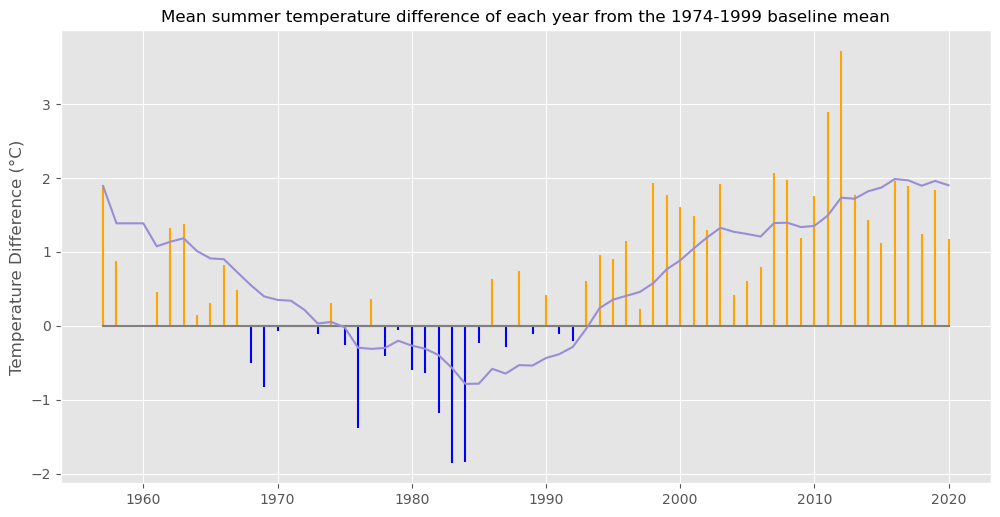

In [45]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot years with mean temperature above baseline
ax1 = markers, stemlines1, baseline = plt.stem(above_baseline.index, above_baseline.values, markerfmt=' ', basefmt='grey')
ax1 = plt.setp(stemlines1, color='orange')

# plot years with mean temperature below baseline
ax2 = markers, stemlines, baseline = plt.stem(below_baseline.index, below_baseline.values, markerfmt=' ', basefmt='grey')
ax2 = plt.setp(stemlines, color='blue')

# plot the 10 years rolling average
ax3 = tdiff_df.rolling_avg.plot()

# set tick params
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Temperature Difference (°C)', size=12)

# set title
ax.set_title('Mean summer temperature difference of each year from the 1974-1999 baseline mean', size=12)

plt.savefig('./images/summer_temperatures.svg')
plt.show()

##### *Explanation*

<p style='text-align: justify;'>As shown in the graph, in the early years, the mean summer temperature was higher than in the baseline period. It appears, however, that the mean summer temperature decreased over the years and thus from the year 1968 to 1992 it was lower than that of the baseline period. However, as early as 1984 the mean summer temperature had started to increase and show an upward trend. Thus, from 1993 to the present day, the deviation of the mean summer temperature from that of the baseline period has been increasing continuously - with some periods of decline - reaching a maximum deviation from the baseline period of almost four points in 2012. In simple terms, the temperature in Athens has been increasing continuously in recent years, which is justified by the phenomenon of climate change.</p>

---

## 3. Evolution of Daily Temperatures <a class='anchor' id='daily_temperatures'></a>

- We will get the average temperature of each year for the entire period from 1955 to 2020
- We will then create a plot showing the daily temperature of each year
- The line corresponding to each year will be smoothed using a 30-day rolling average
- The lines will be coloured from light orange to dark orange, progressing in ascending order through the years 
- On that plot we will overlay a black line showing the average daily temperature for the baseline period 1974-1999
- The line will also be smoothed using a 30-year rolling average
- What is your interpretation of the figure?

In [46]:
noaa.head()

,date,prcp,tavg,tmax,tmin,mean_temperature,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,NaN


### *3.1. Baseline* <a class='anchor' id='baseline_3'></a>

##### *Get the 30-year rolling average of the average daily temperature for the baseline period 1974-1999*

- Get the baseline dataframe (the required conditions have already been defined earlier)
- Group the baseline dataframe by day of year (from 1 to 366)
- Calculate the baseline average daily temperature
- Calculate the 30-day rolling average of the baseline average daily temperature

In [47]:
# get the baseline dataframe
baseline_df = noaa[from_1974 & to_1999]

# group by day of year
grouped_by_day = baseline_df.groupby(baseline_df.date.dt.dayofyear)

# calculate the baseline average daily temperature
baseline_mean_daily = grouped_by_day.tavg.mean()

# convert series to dataframe
baseline_mean_daily = baseline_mean_daily.to_frame()

# add column representing the day of year (from 1 to 366)
baseline_mean_daily['doy'] = range(1, 367)

# calculate the 30-day rolling average of the baseline average daily temperature
baseline_mean_daily['rolling_avg'] = baseline_mean_daily.tavg.rolling(30, min_periods=1).mean()

### *3.2. Main graph* <a class='anchor' id='main_graph_3'></a>

##### *Calculate the 30 days rolling average of the daily temperature of each year*

- **Step 1:** Make some plot configurations
- **Step 2:** Plot the graph

##### *Make some plot configurations*

- Configure the `xticks` - match the first day of each month with the corresponding day of the year (documentation found [here](https://cals.arizona.edu/AZMET/doy.htm))
- Configure the `xticklabels` using month abbreviations

In [48]:
# configure xticks
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]

# configure xticklabels
month_abbrev = list(calendar.month_abbr)[1:]

##### *Plot the graph*

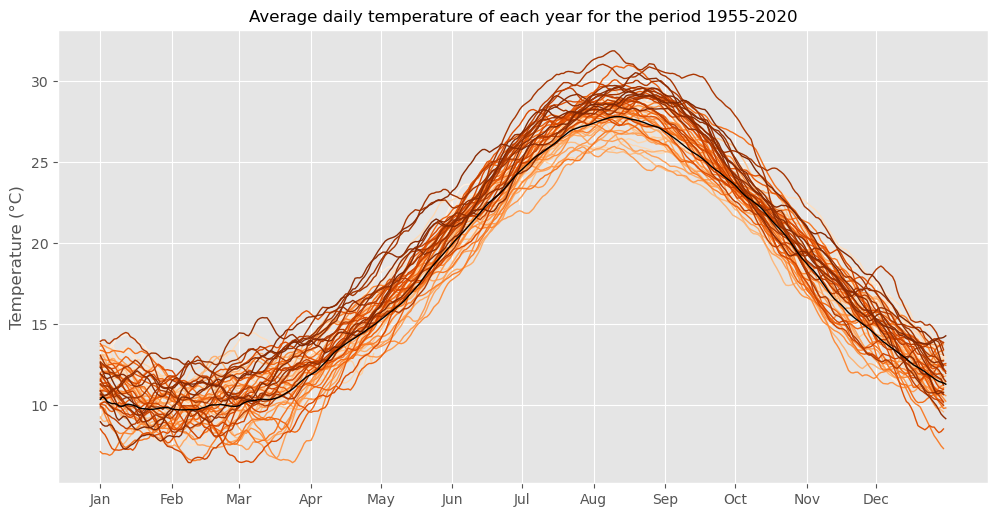

In [49]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot the 30-day rolling average of the daily temperature of each year
ax1 = sns.lineplot(x=noaa.date.dt.dayofyear,
                   y=noaa.tavg.rolling(30, min_periods=1).mean(),
                   hue=noaa.date.dt.year,
                   palette='Oranges',
                   lw=1,
                   legend=False) 
                    
# plot the 30-year rolling average of the average daily temperature for the baseline period 1974-1999
ax2 = sns.lineplot(x=baseline_mean_daily.doy,
                   y=baseline_mean_daily.rolling_avg,
                   color='black',
                   lw=1,
                   legend=False)

# set tick params
ax.set_xticks(month_starts)
ax.set_xticklabels(month_abbrev)
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Temperature (°C)', size=12)

# set title
ax.set_title('Average daily temperature of each year for the period 1955-2020', size=12)

plt.savefig('./images/daily_temperatures.svg')
plt.show()

##### *Explanation*

<p style='text-align: justify;'>The graph shows the daily temperature, for each year from 1955 to 2020, over the course of a year. The lines representing the years are coloured from light orange to dark orange, progressing through the years in ascending order. The first thing we see, and of course we know this, is that in the summer months the temperature is higher, while the opposite is true in the winter months. The black line on the graph shows the average daily temperature during the baseline period, from 1974 to 1999. If we observe the graph carefully, we can see that the lines above the black line are darker than those below it. And in general, the lines higher up on the graph tend to be darker than the lines lower down. This could be interpreted as the daily temperature gradually increasing over the years. This conclusion is also confirmed by the data we obtained from the first graph.</p>

---

## 4. Extreme Temperature Events <a class='anchor' id='extreme_events'></a>

- Another measure used by climatologists is the number of extreme events
- Extreme events are defined as those beyond 5% or 10% from the expected value
- We will deal with extreme heat events going 10% above the baseline
- We will count the number of extreme temperature events per year, compared to the baseline 1974-1999
- The vertical axis in our graph will be the percentage of extreme heat events calculated over the number of observations for each year
- The grey line in the middle will be the average percentage of extreme temperature events of the baseline
- The blue colour will be used for years in which the percentage is lower than the baseline; otherwise the colour will be orange
- What is your interpretation of the figure?

In [50]:
noaa.head()

,date,prcp,tavg,tmax,tmin,mean_temperature,max_temperature,min_temperature,daily_rainfall
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,NaN


### *4.1. Baseline* <a class='anchor' id='baseline_4'></a>

##### *Calculate the baseline mean temperature of each day of year*

- Get the baseline dataframe (the required conditions have already been defined earlier)
- Create a new column called `doy` representing the day of year (from 1 to 366)
- Group the baseline dataframe by `doy` and calculate the baseline mean temperature of each day of year

In [51]:
# get the baseline dataframe
baseline_df = noaa[from_1974 & to_1999]

# add column representing the day of year (from 1 to 366)
baseline_df['doy'] = baseline_df.date.dt.dayofyear

# get the baseline mean temperature of each day of year
mean_doy = baseline_df.groupby('doy').tavg.mean()

In [52]:
mean_doy

doy
1      10.365385
2      10.707692
3      10.215385
4       9.634615
5       9.919231
         ...    
362    10.261538
363    10.653846
364    11.011538
365    11.165385
366     9.833333
Name: tavg, Length: 366, dtype: float64

##### *Calculate the average percentage of extreme temperature events of the baseline period*

- Create a pivot table showing the `tavg` values of each day of the year from 1974 to 1999
- Add as a new column the mean temperature of each day of the year that we calculated earlier, called `mean_doy`

In [53]:
# create pivot table
pvt_base = pd.pivot_table(baseline_df, values='tavg', columns=baseline_df.date.dt.year, index=baseline_df.date.dt.dayofyear)

# add new column with the mean temperature of each day of the year
pvt_base['mean_doy'] = mean_doy

In [54]:
pvt_base.head()

date,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,mean_doy
date,,,,,,,,,,,,,,,,,,,,,
1,11.6,8.7,11.3,10.2,7.0,16.6,10.7,8.0,11.7,1.8,...,11.2,3.6,8.0,12.1,17.6,13.9,12.7,9.4,9.1,10.365385
2,13.7,7.5,12.4,9.1,4.6,14.2,11.3,8.2,14.8,4.7,...,13.2,5.1,8.2,12.2,17.6,14.1,11.7,10.4,10.2,10.707692
3,12.2,7.8,13.6,9.1,6.1,4.4,11.2,6.4,11.3,5.6,...,10.3,9.4,9.4,10.3,12.5,12.7,12.8,12.0,13.2,10.215385
4,10.8,7.2,13.6,7.4,8.9,3.8,4.9,11.8,10.0,7.8,...,10.6,9.5,7.5,10.2,10.5,9.9,15.3,12.5,13.3,9.634615
5,9.6,7.7,8.4,6.2,9.4,15.3,3.3,13.1,10.6,9.8,...,11.6,10.7,5.3,12.3,11.2,8.3,15.3,12.7,10.9,9.919231


##### *Compare the daily temperatures of each year with the baseline mean daily temperature*

- For each year (*column*), compare its values (*daily temperature*) with the corresponding value in `mean_doy` (*baseline mean daily temperature*)
- For each year (*column*), after the value comparison, a new column will be created with the name `<year>_count` (e.g. `2000_count`)
- These new columns will be filled in with either 0 or 1, under the following condition:
    - If the `tavg` value of the year (column) is greater than the corresponding `mean_doy` value, it will be filled in with 1. Otherwise, with 0.

In [55]:
# compare the daily temperature of each year with baseline mean daily temperature
for col in pvt_base.columns[0:26]:
    pvt_base[f'{col}_count'] = np.where((pvt_base[col] > (1.1*pvt_base['mean_doy'])), 1, 0)

##### *Calculate the average percentage of extreme temperature events in the baseline period 1974-1999*

- Sum the values of each new column (vertical sum) and get the number of extreme temperature events per year
- Count the number of observations per year
- Calculate the percentage of extreme heat events by dividing the # of extreme events per year by the # of observations per year

In [56]:
# count extreme events per year
base_extreme_events=[pvt_base[col].sum() for col in pvt_base.columns[27:]]

# count observations per year
base_obs_per_year = baseline_df[baseline_df.tavg.notna()].groupby(baseline_df.date.dt.year)['doy'].count()

# pass values to a dictionary
base_dict = {'extreme_events': base_extreme_events, 'observations': base_obs_per_year}
base_df_extr = pd.DataFrame(data=base_dict)

# calculate the percentage of extreme events per year
base_df_extr['ratio'] = base_df_extr.extreme_events / base_df_extr.observations

# calculate the average percentage of extreme events per year
ratio_prc = base_df_extr['ratio'].mean()

# display results
print(f'The average percentage of extreme temperature events of the baseline is {ratio_prc}.')

The average percentage of extreme temperature events of the baseline is 0.2481314415207134.


### *4.2. Main graph* <a class='anchor' id='main_graph_4'></a>

- The steps will be exactly the same as for the baseline period

In [57]:
# create pivot table
main_pvt = pd.pivot_table(noaa, values='tavg', columns=noaa.date.dt.year, index=noaa.date.dt.dayofyear)

# add column of mean temperature of each day of year
main_pvt['mean_doy'] = mean_doy

# compare daily temperature of each year with baseline mean daily temperature
for col in main_pvt.columns[0:61]: #66
    main_pvt[f'{col}_count'] = np.where((main_pvt[col] > (1.1*main_pvt['mean_doy'])), 1, 0)

# count extreme events per year
main_extreme_events=[main_pvt[col].sum() for col in main_pvt.columns[62:]]

# count observations per year
noaa['doy'] = noaa.date.dt.dayofyear
main_obs_per_year = noaa[noaa.tavg.notna()].groupby(noaa.date.dt.year)['doy'].count()

# pass values to a dictionary
main_dict = {'extreme_events': main_extreme_events, 'observations': main_obs_per_year}
main_df_extr = pd.DataFrame(data=main_dict)

# calculate the percentage of extreme events per year
main_df_extr['ratio'] = main_df_extr.extreme_events / main_df_extr.observations

##### *Get the years with percentage of extreme events above or below baseline*

In [58]:
# years with percentage of extreme events above baseline
above_baseline = main_df_extr[main_df_extr.ratio > ratio_prc]

# years with percentage of extreme events below baseline
below_baseline = main_df_extr[main_df_extr.ratio < ratio_prc]

##### *Plot the graph*

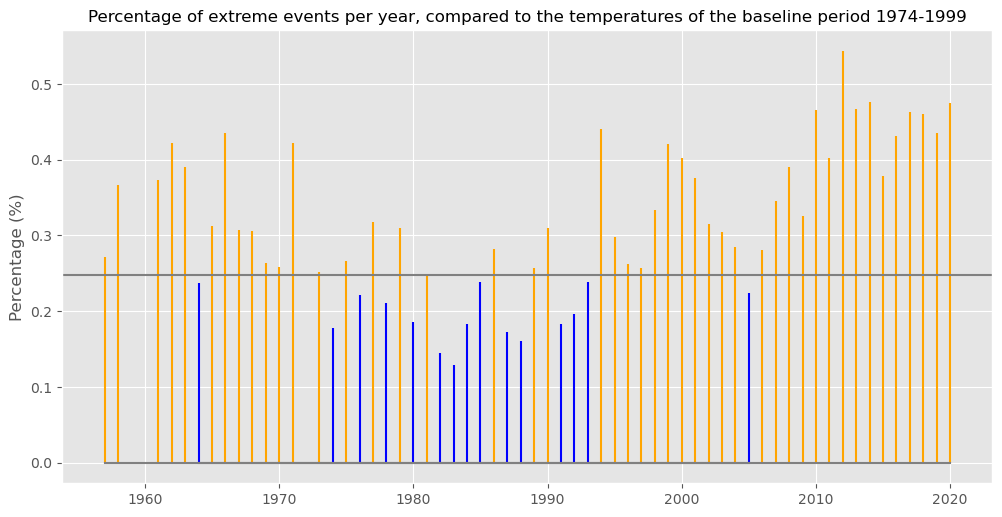

In [59]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot years with percentage of extreme events above baseline
ax1 = markers, stemlines, baseline = plt.stem(above_baseline.index, above_baseline.ratio, markerfmt=' ', basefmt='grey')
ax1 = plt.setp(stemlines, color='orange')

# plot years with percentage of extreme events below baseline
ax2 = markers, stemlines, baseline = plt.stem(below_baseline.index, below_baseline.ratio, markerfmt=' ', basefmt='grey')
ax2 = plt.setp(stemlines, color='blue')

# plot the average percentage of extreme temperature events of the baseline
ax3 = plt.axhline(ratio_prc, color='grey')

# set tick params
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Percentage (%)', size=12)

# set title
ax.set_title('Percentage of extreme events per year, compared to the temperatures of the baseline period 1974-1999', size=12)

plt.savefig('./images/extreme_events.svg')
plt.show()

##### *Explanation*

<p style='text-align: justify;'>The graph shows the ratio of extreme temperature events to the number of available observations per year. The baseline period for defining an event as extreme or not is the period from 1974 to 1999 and the temperatures observed during this period. If we observe the graph, we see the same trend we saw in the two previous graphs. The ratio of extreme temperature events seems to have a downward trend - with some local peaks - from 1955 to 1983, a period during which, as we observed earlier, the temperature was also gradually decreasing. From 1984 onwards, the ratio of extreme temperature events starts to increase, although there are also some decreases, following the upward trend in temperature that we also observed earlier.</p>

---

## 5. Precipitation <a class='anchor' id='precipitation'></a>

- Continuing the theme of extreme events, another consideration is rainfall
- We are interested in whether precipitation becomes more intense over time
- To see this, we will count the total rainfall over the year and the number of rainy days in each year
- Then, by dividing the rainfall by the number of rainy days, we will get an indication of whether we have rain in more concentrated bursts
- We will then create a plot showing the volume of rainfall per rainy day over the years
- On the plot we will overlay the 10-year rolling average
- What is your interpretation of the figure?

In [60]:
noaa.head()

,date,prcp,tavg,tmax,tmin,mean_temperature,max_temperature,min_temperature,daily_rainfall,doy
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,NaN,1
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,NaN,2
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,NaN,3
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,NaN,4
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,NaN,5


### *5.1. Main graph* <a class='anchor' id='main_graph_5'></a>

##### *Plot the volume of rainfall per rainy days over the years*

- **Step 1:** Count the total rainfall of each year
- **Step 2:** Count the number of rainy days in each year
- **Step 3:** Pass the values into a new dataframe called `precipitation`
- **Step 4:** Get the volume of rainfall per rainy day over the years by dividing the total rainfall by the number of rainy days in each year
- **Step 5:** Calculate the 10-year rolling average

##### *Count the total rainfall of each year*

- Group the dataframe by year
- Get the total precipitation level of each year

In [61]:
# group by year and get the total precipitation level of each year
rainfall = noaa.groupby(noaa.date.dt.year)['prcp'].apply(lambda x: x[x > 0.0].sum()) # sum all x-es where x > 0

In [62]:
rainfall

date
1955    547.0
1956    281.3
1957    303.2
1958    350.0
1959    214.0
        ...  
2016    243.6
2017    303.5
2018    379.2
2019    570.0
2020    210.4
Name: prcp, Length: 66, dtype: float64

##### *Count the number of rainy days in each year*

- Group the dataframe by year
- Count the number of days on which the precipitation level is greater than 0

In [63]:
# group by year and count the number of days with precipitation > 0
rainy_days = noaa.groupby(noaa.date.dt.year)['prcp'].apply(lambda x: x[x > 0.0].count())

In [64]:
rainy_days

date
1955    68
1956    52
1957    73
1958    68
1959    62
        ..
2016    38
2017    47
2018    53
2019    58
2020    38
Name: prcp, Length: 66, dtype: int64

##### *Pass the values into a dataframe*

In [65]:
# pass the values into a dictionary
dict_rain = {'rainfall': rainfall, 'rainy_days': rainy_days}

# use the dictionary to create the dataframe
precipitation = pd.DataFrame(data=dict_rain)

In [66]:
precipitation

,rainfall,rainy_days
date,,
1955,547.0,68
1956,281.3,52
1957,303.2,73
1958,350.0,68
1959,214.0,62
...,...,...
2016,243.6,38
2017,303.5,47
2018,379.2,53


##### *Get the volume of rainfall per rainy day the years*

- Divide the total rainfall level of each year by the number of rainy days in that year

In [67]:
# get the volume of rainfall per rainy day over rainy days
precipitation['ratio'] = precipitation.rainfall / precipitation.rainy_days

In [68]:
precipitation

,rainfall,rainy_days,ratio
date,,,
1955,547.0,68,8.044118
1956,281.3,52,5.409615
1957,303.2,73,4.153425
1958,350.0,68,5.147059
1959,214.0,62,3.451613
...,...,...,...
2016,243.6,38,6.410526
2017,303.5,47,6.457447
2018,379.2,53,7.154717


##### *Calculate the 10-year rolling average*

In [69]:
# get the 10-year rolling average
precipitation['rolling_avg'] = precipitation.ratio.rolling(10, min_periods=1).mean()

In [70]:
precipitation

,rainfall,rainy_days,ratio,rolling_avg
date,,,,
1955,547.0,68,8.044118,8.044118
1956,281.3,52,5.409615,6.726867
1957,303.2,73,4.153425,5.869053
1958,350.0,68,5.147059,5.688554
1959,214.0,62,3.451613,5.241166
...,...,...,...,...
2016,243.6,38,6.410526,6.566470
2017,303.5,47,6.457447,6.655676
2018,379.2,53,7.154717,6.825638


##### *Plot the graph*

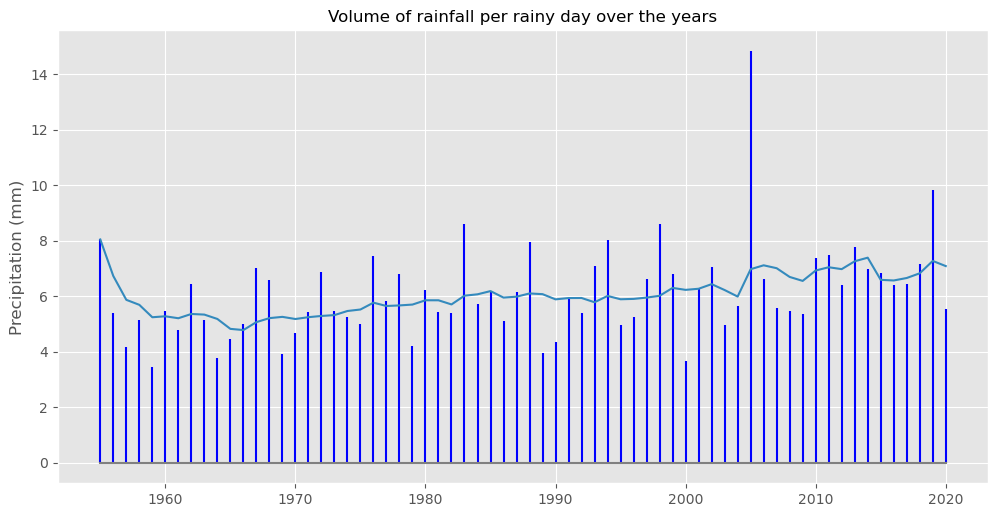

In [71]:
fig, ax = plt.subplots(figsize=(12,6), dpi=100)

# plot the volume of rainfall per rainy day over the years
ax1 = plt.stem(precipitation.index, precipitation.ratio, markerfmt=' ', linefmt='blue', basefmt='grey')

# plot the 10-year rolling average
ax2 = precipitation.rolling_avg.plot()

# set tick params
ax.tick_params(axis='both', labelsize=10)

# set label params
ax.set_xlabel(None)
ax.set_ylabel('Precipitation (mm)', size=12)

# set title
ax.set_title('Volume of rainfall per rainy day over the years', size=12)

plt.savefig('./images/precipitation.svg')
plt.show()

##### *Explanation*

<p style='text-align: justify;'>This graph shows the volume of rainfall over rainy days for each year. To calculate this value, the total rainfall volume for the year is divided by the total number of rainy days in the year. To understand this better, we will focus on the blue line on the graph, which represents the 10-year rolling average of the value of the above fraction. If we observe the blue line we will see that it has a slow but steady upward trend over the years. This means that the volume of rainfall per rainy day is increasing over the years. And this can happen either because the numerator of the fraction is increasing or because the denominator is decreasing. Therefore, it can be interpreted in two ways: either that the volume of rainfall increases over time, or that the number of rainy days decreases. The second scenario seems more likely since, as we observed from the previous graphs, the temperature increases over the years due to the climate change phenomenon. Therefore, it is likely that this increase in temperature is accompanied by fewer rainy days throughout the year, and hence we have rain in more concentrated bursts.</p>

---

*Thank you!*

---